The notebook explores Sperantov's data on tragedies.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import matrix_rank
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import itertools
from scipy.stats import mannwhitneyu

In [2]:
sperantov_data = pd.read_csv('sperantov_raw_data.csv', sep='\t')

In [3]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,2.57,3.41,0.44,0.35,0.00
1,Moderate Neoclassicism,"Сумароков, «Гамлет», 1748",1,2.69,3.54,0.51,0.40,5.40
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,4.19,2.75,0.63,0.28,3.12
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,2.59,3.47,0.20,0.24,2.63
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,3.32,2.98,0.25,0.21,0.00


In [4]:
sperantov_data.shape

(70, 8)

In [5]:
sperantov_data['Актность'].unique()

array(['5', '1', '3', '5, with chorus', '4 scenes, with choruses',
       '3, with choruses and balets', '5 acts, with choruses',
       '5, with choruses', '5, after Shakespeare',
       '5, immitation of Lemierre', '5, immitation of Euripides'],
      dtype=object)

In [6]:
# remove tragedies which are not five acts or are translations/ immitations
sperantov_data = sperantov_data[sperantov_data['Актность']=='5'].copy()

In [7]:
sperantov_data.columns = [col.strip() for col in sperantov_data.columns]

In [8]:
sperantov_data['author'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[0])
sperantov_data['tragedy_title'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[1])
sperantov_data['year'] = sperantov_data['Произведение'].apply(lambda x: x.split(', ')[2])

In [9]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки,author,tragedy_title,year
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,2.57,3.41,0.44,0.35,0.00,Сумароков,«Хорев»,1747
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,4.19,2.75,0.63,0.28,3.12,Сумароков,«Синав и Трувор»,1750
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,2.59,3.47,0.20,0.24,2.63,Сумароков,«Аргистона»,1750
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,3.32,2.98,0.25,0.21,0.00,Ломоносов,«Тамира и Селим»,1750
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,6.82,4.88,1.04,0.28,9.24,Тредиаковский,«Деидамия»,1750


In [10]:
sperantov_data.corr()

,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
частотность,1.000000,0.471137,0.857917,-0.083729,0.715078
протяженность,0.471137,1.000000,0.413024,0.193066,0.400309
внутристиховые ремарки,0.857917,0.413024,1.000000,0.003637,0.823064
лексическое разнообразие,-0.083729,0.193066,0.003637,1.000000,0.117990
характерологические ремарки,0.715078,0.400309,0.823064,0.117990,1.000000


In [11]:
numeric = sperantov_data.iloc[:, 3:-3].copy()

In [12]:
numeric.shape

(57, 5)

In [13]:
# bring the data to scale
scaler = MinMaxScaler()
rescaled_numeric = scaler.fit_transform(numeric)

In [14]:
rescaled_numeric.shape

(57, 5)

In [15]:
sperantov_data.iloc[:, 3:-3] = rescaled_numeric

In [16]:
sperantov_data.head()

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки,author,tragedy_title,year
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,0.056589,0.229167,0.052811,0.642857,0.000000,Сумароков,«Хорев»,1747
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,0.122070,0.076389,0.085179,0.392857,0.124303,Сумароков,«Синав и Трувор»,1750
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,0.057397,0.243056,0.011925,0.250000,0.104781,Сумароков,«Аргистона»,1750
4,Conservative Neoclassicism,"Ломоносов, «Тамира и Селим», 1750",5,0.086904,0.129630,0.020443,0.142857,0.000000,Ломоносов,«Тамира и Селим»,1750
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,0.228375,0.569444,0.155026,0.392857,0.368127,Тредиаковский,«Деидамия»,1750


In [17]:
sperantov_data.corr()

,частотность,протяженность,внутристиховые ремарки,лексическое разнообразие,характерологические ремарки
частотность,1.000000,0.471137,0.857917,-0.083729,0.715078
протяженность,0.471137,1.000000,0.413024,0.193066,0.400309
внутристиховые ремарки,0.857917,0.413024,1.000000,0.003637,0.823064
лексическое разнообразие,-0.083729,0.193066,0.003637,1.000000,0.117990
характерологические ремарки,0.715078,0.400309,0.823064,0.117990,1.000000


In [18]:
sperantov_data.year.unique()

array(['1747', '1750', '1751', '1758', '1762', '1767', '1768', '1769',
       '1771', '1772', '1773', 'начало 1770-х', '1774', 'середина 1770-х',
       '1779', '1780', '1781', '1782', '1784', '1785', '1786',
       'около 1787', '1787', '1789', '1794', '1790-е годы', '1798',
       '1804', '1806', '1807', '1808', '1808—1809', '1809', '1810',
       '1811', '1814', '1815', '1822'], dtype=object)

In [19]:
sperantov_data[(sperantov_data.year=='середина 1770-х')].index[0]

23

In [20]:
# since we are mainly interested in different periods, we will update the years so that they remain in the same period,
# but are easier to convert to numeric data format  

sperantov_data.loc[sperantov_data[sperantov_data.year=='начало 1770-х'].index[0], 'year'] = 1770
sperantov_data.loc[sperantov_data[sperantov_data.year=='середина 1770-х'].index[0], 'year'] = 1775
sperantov_data.loc[sperantov_data[sperantov_data.year=='около 1787'].index[0], 'year'] = 1787
# reference to the beginning of 1790s in Русская литература, век XVIII.Трагедия Западов.
sperantov_data.loc[sperantov_data[sperantov_data.year=='1790-е годы'].index[0], 'year'] = 1790
sperantov_data.loc[sperantov_data[sperantov_data.year=='1808—1809'].index[0], 'year'] = 1808
sperantov_data.loc[sperantov_data[sperantov_data.year=='1808—1809'].index[0], 'year'] = 1808

In [21]:
sperantov_data['year'] = sperantov_data['year'].astype(int)

In [22]:
matrix_rank(sperantov_data.iloc[:, 3:-3])

5

In [23]:
pca = PCA(n_components=1)

(0.7100739479064941, 2.6440334366384377e-09)
(0.9231039881706238, 0.001414783182553947)
(0.6491574645042419, 2.0827643776311078e-10)
(0.7930092811584473, 1.5794257990364713e-07)
(0.9880186915397644, 0.8436722159385681)


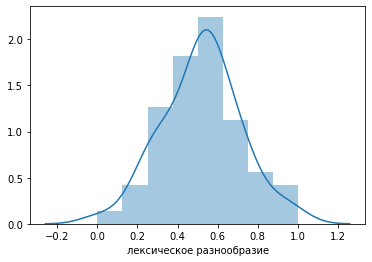

In [24]:
print(shapiro(sperantov_data['частотность']))
print(shapiro(sperantov_data['протяженность']))
print(shapiro(sperantov_data['внутристиховые ремарки']))
print(shapiro(sperantov_data['характерологические ремарки']))
print(shapiro(sperantov_data['лексическое разнообразие']))
sns.distplot(sperantov_data['лексическое разнообразие'])
plt.show()

Since we want to follow Sperantov as closely as we can, we will exclude 'лексическое разнообразие' like he did as it can be influenced by a confounding influence of language evolution.

In [25]:
sperantov_data.drop('лексическое разнообразие', axis=1, inplace=True)

In [26]:
pca_transformed = pca.fit_transform(sperantov_data.iloc[:, 3:-3])

In [27]:
pca_transformed.shape

(57, 1)

In [28]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.7156404]
0.7156403985001588


In [29]:
sperantov_data['pca_component_1'] = pca_transformed

In [30]:
sperantov_data.head(3)

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
0,Conservative Neoclassicism,"Сумароков, «Хорев», 1747",5,0.056589,0.229167,0.052811,0.000000,Сумароков,«Хорев»,1747,-0.262301
2,Conservative Neoclassicism,"Сумароков, «Синав и Трувор», 1750",5,0.122070,0.076389,0.085179,0.124303,Сумароков,«Синав и Трувор»,1750,-0.199036
3,Conservative Neoclassicism,"Сумароков, «Аргистона», 1750",5,0.057397,0.243056,0.011925,0.104781,Сумароков,«Аргистона»,1750,-0.214441


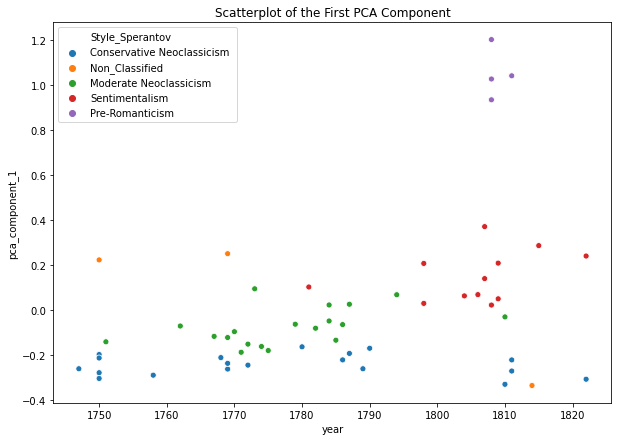

In [31]:
plt.figure(figsize=(10, 7))
plt.title('Scatterplot of the First PCA Component')
sns.scatterplot(x='year', y='pca_component_1', data=sperantov_data, hue='Style_Sperantov')
plt.show()

In [32]:
shapiro(sperantov_data['pca_component_1'])

(0.7565470337867737, 2.348713934452462e-08)

In [33]:
period_one = sperantov_data[(sperantov_data.year>=1747)&(sperantov_data.year<=1762)]
period_two = sperantov_data[(sperantov_data.year>=1763)&(sperantov_data.year<=1794)]
period_three = sperantov_data[(sperantov_data.year>=1795)&(sperantov_data.year<=1810)]
period_four = sperantov_data[(sperantov_data.year>=1811)&(sperantov_data.year<=1827)]

## Identify and Remove Outliers

We will identify outliers using the following method: a datapoint that is 2 standard deviations away from the mean will be considered an outlier.

## Outliers for Period One

In [34]:
upper_boundary = period_one['pca_component_1'].mean() + 2*period_one['pca_component_1'].std()
lower_boundary = period_one['pca_component_1'].mean() - 2*period_one['pca_component_1'].std()

In [35]:
display(period_one[period_one['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
5,Non_Classified,"Тредиаковский, «Деидамия», 1750",5,0.228375,0.569444,0.155026,0.368127,Тредиаковский,«Деидамия»,1750,0.222268


In [36]:
display(period_one[period_one['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [37]:
period_one = period_one[period_one.tragedy_title!='«Деидамия»']

In [38]:
print(period_one.shape)

(8, 11)


## Outliers for Period Two

In [39]:
upper_boundary = period_two['pca_component_1'].mean() + 2*period_two['pca_component_1'].std()
lower_boundary = period_two['pca_component_1'].mean() - 2*period_two['pca_component_1'].std()

In [40]:
display(period_two[period_two['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
15,Non_Classified,"Ржевский, «Подложный Смердий», 1769",5,0.304365,0.756944,0.158433,0.242629,Ржевский,«Подложный Смердий»,1769,0.249955


In [41]:
display(period_two[period_two['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [42]:
period_two = period_two[period_two.tragedy_title!='«Подложный Смердий»']

In [43]:
print(period_two.shape)

(26, 11)


## Outliers for Period Three

In [44]:
upper_boundary = period_three['pca_component_1'].mean() + 2*period_three['pca_component_1'].std()
lower_boundary = period_three['pca_component_1'].mean() - 2*period_three['pca_component_1'].std()

In [45]:
display(period_three[period_three['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1
50,Pre-Romanticism,"Державин, «Ирод и Мариамна», 1808",5,0.595392,0.50463,1.0,1.0,Державин,«Ирод и Мариамна»,1808,1.203172


In [46]:
display(period_three[period_three['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [47]:
period_three['pca_component_1'].mean() + 2*period_three['pca_component_1'].std()

1.1814132716051384

In [48]:
period_three = period_three[period_three.tragedy_title!='«Ирод и Мариамна»']

In [49]:
print(period_three.shape)

(13, 11)


## Outliers for Period Four

In [50]:
upper_boundary = period_four['pca_component_1'].mean() + 2*period_four['pca_component_1'].std()
lower_boundary = period_four['pca_component_1'].mean() - 2*period_four['pca_component_1'].std()

In [51]:
display(period_four[period_four['pca_component_1']>=upper_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


In [52]:
display(period_four[period_four['pca_component_1']<=lower_boundary])

,Style_Sperantov,Произведение,Актность,частотность,протяженность,внутристиховые ремарки,характерологические ремарки,author,tragedy_title,year,pca_component_1


### Statistical Tests

In [53]:
print(period_four.shape)

(7, 11)


In [54]:
kruskal(period_one['частотность'], 
        period_two['частотность'], 
        period_three['частотность'], 
        period_four['частотность'])

KruskalResult(statistic=16.054176477660242, pvalue=0.0011053476719915785)

In [55]:
kruskal(period_one['протяженность'], 
        period_two['протяженность'], 
        period_three['протяженность'], 
        period_four['протяженность'])

KruskalResult(statistic=15.002398975509799, pvalue=0.001814600023858464)

In [56]:
kruskal(period_one['внутристиховые ремарки'], 
        period_two['внутристиховые ремарки'], 
        period_three['внутристиховые ремарки'], 
        period_four['внутристиховые ремарки'])

KruskalResult(statistic=10.26836457333417, pvalue=0.01641742359141901)

In [57]:
kruskal(period_one['характерологические ремарки'], 
        period_two['характерологические ремарки'], 
        period_three['характерологические ремарки'], 
        period_four['характерологические ремарки'])

KruskalResult(statistic=7.875346201996651, pvalue=0.048659412167741806)

In [58]:
kruskal(period_one['pca_component_1'], 
        period_two['pca_component_1'], 
        period_three['pca_component_1'], 
        period_four['pca_component_1'])

KruskalResult(statistic=15.930241980241988, pvalue=0.0011719444041232848)

In [59]:
print(mannwhitneyu(period_one['частотность'], 
                   period_two['частотность']))
print(mannwhitneyu(period_one['протяженность'], 
                   period_two['протяженность']))
print(mannwhitneyu(period_one['внутристиховые ремарки'], 
                   period_two['внутристиховые ремарки']))
print(mannwhitneyu(period_one['характерологические ремарки'], 
                   period_two['характерологические ремарки']))
print(mannwhitneyu(period_one['pca_component_1'], 
                   period_two['pca_component_1']))

MannwhitneyuResult(statistic=40.0, pvalue=0.004964525159727888)
MannwhitneyuResult(statistic=103.0, pvalue=0.4919008110192774)
MannwhitneyuResult(statistic=83.5, pvalue=0.20834300004055284)
MannwhitneyuResult(statistic=60.0, pvalue=0.0362037274015027)
MannwhitneyuResult(statistic=44.0, pvalue=0.007852629419458593)


In [60]:
print(mannwhitneyu(period_two['частотность'], 
                   period_three['частотность']))
print(mannwhitneyu(period_two['протяженность'], 
                   period_three['протяженность']))
print(mannwhitneyu(period_two['внутристиховые ремарки'], 
                   period_three['внутристиховые ремарки']))
print(mannwhitneyu(period_two['характерологические ремарки'], 
                   period_three['характерологические ремарки']))
print(mannwhitneyu(period_two['pca_component_1'], 
                   period_three['pca_component_1']))

MannwhitneyuResult(statistic=70.0, pvalue=0.0016694687888751602)
MannwhitneyuResult(statistic=41.0, pvalue=7.239207156548499e-05)
MannwhitneyuResult(statistic=70.0, pvalue=0.0016654762970883645)
MannwhitneyuResult(statistic=110.0, pvalue=0.0402490873901165)
MannwhitneyuResult(statistic=47.0, pvalue=0.00014744399499123156)


In [61]:
print(mannwhitneyu(period_three['частотность'], 
                   period_four['частотность']))
print(mannwhitneyu(period_three['протяженность'], 
                   period_four['протяженность']))
print(mannwhitneyu(period_three['внутристиховые ремарки'], 
                   period_four['внутристиховые ремарки']))
print(mannwhitneyu(period_three['характерологические ремарки'], 
                   period_four['характерологические ремарки']))
print(mannwhitneyu(period_three['pca_component_1'], 
                   period_four['pca_component_1']))

MannwhitneyuResult(statistic=29.0, pvalue=0.10241930311425046)
MannwhitneyuResult(statistic=31.0, pvalue=0.13362874657719392)
MannwhitneyuResult(statistic=29.0, pvalue=0.10233415980910093)
MannwhitneyuResult(statistic=32.5, pvalue=0.1600430376756653)
MannwhitneyuResult(statistic=36.0, pvalue=0.23786534447943214)
